# Homework 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
pi      = np.pi
deg2rad = pi / 180.0
rad2deg = 180.0 / pi

min2rad = deg2rad / 60.0
rad2min = rad2deg * 60.0

sec2rad = min2rad / 60.0
rad2sec = rad2min * 60.0

radius_earth = 6378

au2km = 1.496e+8

## Question 1

### 1a),b)

In [7]:
def coord2elem(x, y, z, vx, vy, vz, mu):
    
    r = np.sqrt(x  **2  + y  ** 2 + z ** 2)
    v = np.sqrt(vx ** 2 + vy ** 2 + vz ** 2)
    
    h = (v ** 2) / 2 - mu / r
    
    c1 = y * vz - z * vy
    c2 = z * vx - x * vz
    c3 = x * vy - y * vx
    
    l1 = - mu * x / r + vy * c3 - vz * c2
    l2 = - mu * y / r + vz * c1 - vx * c3
    l3 = - mu * z / r + vx * c2 - vy * c1
    
    c = np.sqrt(c1 * c1 + c2 * c2 + c3 * c3)
    l = np.sqrt(l1 * l1 + l2 * l2 + l3 * l3)
    
    a = - mu / 2.0 / h
    e = l / mu
    
    # getting inclination
    cosi = c3 / c
    sini = np.sqrt(1 - cosi ** 2)
    i    = np.arctan2(sini, cosi)
    
    # getting longitude of the ascending node
    W = np.arctan2(c1 / c /sini, -c2 / c / sini)
    
    # getting argument of the pericenter
    w = np.arctan2(l3 / l / sini, l1 / l * np.cos(W) + l2 / l * np.sin(W))
    
    # getting u
    u = np.arctan2(z / r / sini, x / r * np.cos(W) + y / r * np.sin(W))
    
    # getting true anomaly
    v = np.arctan2(np.sin(u) * np.cos(w) - np.cos(u) * np.sin(w), np.cos(u) * np.cos(w) + np.sin(u) * np.sin(w))
    
    # getting eccentric anomaly
    sinE = np.sqrt(1-e*e) * np.sin(v) / (1 + e * np.cos(v))
    cosE = (np.cos(v) + e) / (1 + e * np.cos(v))
    E = v + np.arctan((sinE * np.cos(v) - cosE * np.sin(v)) / (cosE * np.cos(v) + sinE * np.sin(v)))
    
    # getting mean anomaly
    M = E - e * np.sin(E)
    
    return (a, e, i, np.mod(w, 2*np.pi), np.mod(W, 2*np.pi), np.mod(M, 2*np.pi))

In [8]:
x=-5.654521158368091E+07
y=-4.141584370434758E+09
z=-2.516187548793956E+09
vx=1.894813995825346E+0
vy=-2.900052383928433E+01
vz=-1.587424775496980E+01
mu_sun = 1.32712440018E11
a,e,i,w,Om,M=coord2elem(x, y, z, vx, vy, vz, mu_sun)
print("Semi-Major Axis = " + str(a))
print("Eccentricity = " + str(e))

Semi-Major Axis = -127382200.63917083
Eccentricity = 3.3633132874254956


/var/folders/lp/nzbfjgh14nv_gzpg4ygpc3_m0000gn/T/ipykernel_62566/1779297931.py:40: RuntimeWarning: invalid value encountered in sqrt
  sinE = np.sqrt(1-e*e) * np.sin(v) / (1 + e * np.cos(v))


### 1c)

Since e > 1, this is on a hyperbolic orbit. It has arrived from outside our solar system.

### 1d)

Since e > 1, this is an interstellar object. These positions and velocities correspond to 2I/Borisov.

## Question 2

### 2a)

In [10]:
data = np.loadtxt('/Users/eai/Documents/Teaching/AA179_Anton/Homework/pset5_input.txt', usecols =
(1,2,3,4,5,6), delimiter = ',')
x = data[:,0]
y = data[:,1]
z = data[:,2]
vx = data[:,3]
vy = data[:,4]
vz = data[:,5]
t = np.arange(0, 60, 1)

In [11]:
a,e,i,_,_,_=coord2elem(x, y, z, vx, vy, vz, mu_sun)

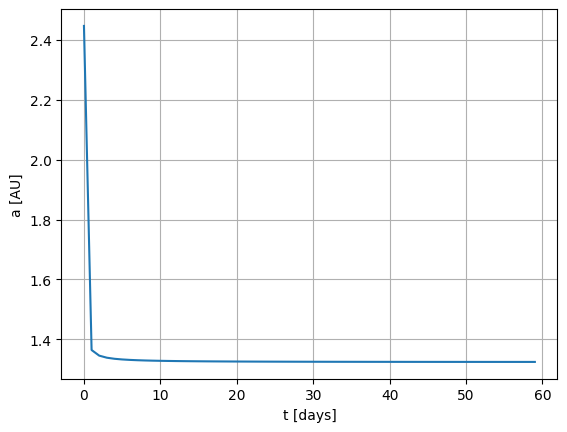

In [12]:
plt.figure()
plt.plot(t,a/au2km)
plt.xlabel("t [days]")
plt.ylabel("a [AU]")
plt.grid()

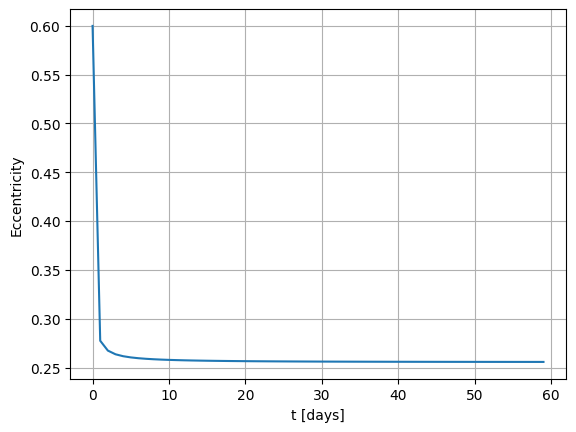

In [13]:
plt.figure()
plt.plot(t,e)
plt.xlabel("t [days]")
plt.ylabel("Eccentricity")
plt.grid()

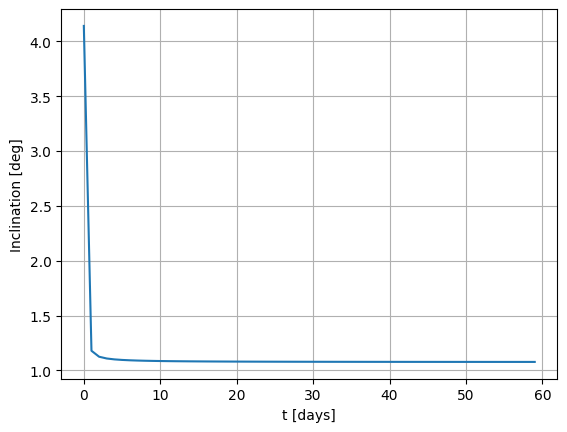

In [14]:
plt.figure()
plt.plot(t,i * rad2deg)
plt.xlabel("t [days]")
plt.ylabel("Inclination [deg]")
plt.grid()

This is not a keplerian orbit because a, e, and i all darastically change in this period, and in a Keplerian orbit they would be constant.

### 2b)

In [15]:
rp = a*(1-e)
ra = a*(1+e)
print("Pericenter Distance = " + str(rp[-1]/au2km) + " AU")
print("Apocenter Distance = " + str(ra[-1]/au2km) + " AU")

Pericenter Distance = 0.9860793596918949 AU
Apocenter Distance = 1.6638186094684673 AU


Earth is 1 AU from the Sun, and Mars is 1.52 AU from the sun. It seems to be in an orbit between Earth and Mars (extending past past a little bit)

### 2c)

It's the Tesla Roadster launched as part of Falcon Heavy's maiden flight in 2018.

## Question 3.1

### 3.1.a)

Let's compute the $\Delta v$ for a Hohmann transfer.

In [17]:
a_earth = 1 * au2km
a_mars = 1.52 * au2km

dv1 = np.sqrt(mu_sun/a_earth) * (np.sqrt(2*a_mars / (a_earth + a_mars)) - 1)
dv2 = np.sqrt(mu_sun/a_mars) * (1 - np.sqrt(2*a_earth / (a_earth + a_mars)) )

dv_total = dv1 + dv2

print("Total delta v:", dv_total, "[km/s]")

Total delta v: 5.565371810309461 [km/s]


### 3.1.b)

The time of the Hohmann transfer is:

In [18]:
t_hohmann = np.pi * np.sqrt((a_earth+a_mars)**3 / (8 * mu_sun))

t_days = t_hohmann / 86400

print(t_days)

258.30542125709826


### 3.1.c)

For a successful Hohmann transfer, the difference in the ecliptic longitude of the spacecraft from Earth's orbit at launch to the Martian orbit upon arrival should be 180 degrees. Thus,

$L_{mars}(t_f) - L_{earth}(t_l) =  \pm 180$

where $t_f$ is the arrival time at Mars and $t_l$ is the launch time.

Expanding this expression using the definition of the ecliptic longitude, it becomes:

$L_{0,mars} - L_{0,earth} + n_{mars} * (t_f-t_l) + (t_l - t_0)*(n_{mars} - n_{earth}) = \pm 180$

We solve for $(t_l - t_0)$ to find when to launch.

In [19]:
n_mars = 0.5236          # deg/day
n_earth = 0.9856         # deg/day

L_earth_0 = 245.62      # deg
L_mars_0 = 173.71       # deg

dt = (-180 - (L_mars_0 - L_earth_0 + 258 * n_mars) ) / (n_mars - n_earth)

print("Days after May 27, 2025:", dt, "days")

Days after May 27, 2025: 526.3610389610388 days


This gives a final launch date and time of:

2026-11-08 08:39:50 UTC

### 3.1.d)

The time between successive Hohmann transfer opportunities is the time it'll take for Mars and Earth to get back to the same relative positions, which is given by the synodic period.

In [21]:
T_earth = 365.25            # days
T_mars  = 687.27             # days

syn_period = 1 / (1/T_earth - 1/T_mars)

print("Time between 2 successive Hohmann transfer opportunities:", syn_period, "days")

Time between 2 successive Hohmann transfer opportunities: 779.5334684181107 days


## Question 3.2

### 3.2.a)

We want the rate of change of $\Omega$ to be equal to the mean motion of Mars.

In [23]:
h = 400
J2 = 1.96 * 10**(-3)
R_mars = 3376
mu_mars = 4.282837e+4
q = 400
Q = 5000

Omdot = 2*pi/(T_mars*86400)
a = R_mars + h
n = np.sqrt(mu_mars/a**3)

i = np.arccos(-2*Omdot/(3*n*J2)*(a/R_mars)**2)*rad2deg
print("Inclination = " + str(i) + " degrees")

Inclination = 92.89360984094102 degrees


### 3.2.b)

The fist maneuver should be an inclination change that occurs at the apoapsis. Note the argument of the pericenter has not be either 0 or 180 degrees for the apocenter to be at the node, where an out-of-plane delta v would lead only to a change in inclinaiton. The second maneuver should be a circularization that occurs at the pericenter.

In [25]:
# Inclination Change

r_a = Q + R_mars
r_p = q + R_mars
a = (r_a + r_p) / 2

di = i - 20
di_rad = di * deg2rad

v1 = np.sqrt(mu_mars * (2/r_a - 1/a))
dv1 = np.sqrt(v1**2 + v1**2 - 2*v1*v1*np.cos(di_rad))

# Circularization

v2 = np.sqrt(mu_mars * (2/r_p - 1/a))
v_circ = np.sqrt(mu_mars / r_p)
dv2 = v2 - v_circ

print("Inclination change:", dv1, "[km/s]")
print("Circularization burn:", dv2, "[km/s]")
print("Total delta v:", dv1+dv2, "[km/s]")

Inclination change: 2.1180036442349994 [km/s]
Circularization burn: 0.586378419234963 [km/s]
Total delta v: 2.7043820634699625 [km/s]


## Question 3.3

### 3.3.a)

The stationary orbit is at the altitude where the orbital period is equal to the Mars day.

T = 24 hr, 37 min, 22.7s = 88775.7 s

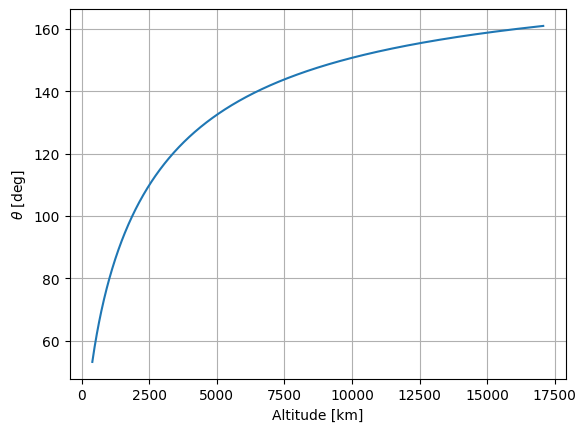

In [28]:
T_mars = 88775.7 # rotation period in seconds
stationary_rad = (mu_mars*T_mars**2 / (4*np.pi**2))**(1/3) # radius of areastationary orbit
stationary_alt = stationary_rad - R_mars # altitude of areastationary orbit

h = np.linspace(400,stationary_alt,1000)
th = 2*np.arccos(R_mars/(R_mars+h))
plt.figure()
plt.plot(h,th * rad2deg)
plt.xlabel("Altitude [km]")
plt.ylabel(r"$\theta$ [deg]")
plt.grid()

### 3.3.b)

In order to increase the radius of visibility of a satellite, the designer must increase the altitude. However, this also reduces the image resolution of the satellite as it is further from Mars.

### 3.3.c)

The instantaneous field of view is:

IFOV = D/h

In this case,

IFOV = 10 / 400000 = 25 $\mu$ rad

### 3.3.d)

The FOV is:

FOV = 2 * arctan(2.5/400) = 0.0125 rad = 0.716 degrees